In [162]:
# sort out order to work out code dict again, then try concat the dfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df_d.info(max_cols=460)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38152 entries, 0 to 38151
Data columns (total 122 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qweek               38152 non-null  object 
 1   age                 38152 non-null  int64  
 2   weight              38152 non-null  float64
 3   gender              38152 non-null  object 
 4   household_size      38152 non-null  object 
 5   household_children  38152 non-null  object 
 6   employment_status   38152 non-null  object 
 7   i1_health           27136 non-null  float64
 8   i2_health           38152 non-null  int64  
 9   i7a_health          32154 non-null  float64
 10  i3_health           19917 non-null  object 
 11  i10_health          31150 non-null  object 
 12  i11_health          37148 non-null  object 
 13  i12_health_1        38152 non-null  object 
 14  i12_health_2        38152 non-null  object 
 15  i12_health_6        38152 non-null  object 
 16  i12

In [69]:
df_nuls = pd.DataFrame(df_d.isnull().sum(axis=0).sort_values())

In [70]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_nuls = df_nuls[df_nuls[0]<6600]
#df_nuls.reset_index(inplace=True)
df_nuls

,0
qweek,0
i12_health_13,0
i12_health_12,0
i12_health_11,0
i12_health_8,0
i12_health_6,0
i12_health_2,0
i12_health_1,0
Country,0
employment_status,0


In [61]:
real_list = df_nuls['index'].tolist()
joint = list(set(real_list) & set(codes))
joint

['qweek',
 'd1_health_3',
 'household_size',
 'PHQ4_2',
 'i12_health_12',
 'd1_health_9',
 'i11_health',
 'd1_health_98',
 'd1_health_10',
 'r1_7',
 'PHQ4_3',
 'i2_health',
 'd1_health_11',
 'WCRex2',
 'r1_1',
 'r1_6',
 'd1_health_4',
 'cantril_ladder',
 'i7a_health',
 'i12_health_2',
 'd1_health_7',
 'd1_health_8',
 'i12_health_11',
 'd1_health_1',
 'd1_health_2',
 'PHQ4_1',
 'd1_health_99',
 'd1_health_5',
 'weight',
 'i12_health_8',
 'household_children',
 'i12_health_1',
 'd1_health_12',
 'WCRex1',
 'r1_2',
 'i12_health_13',
 'd1_health_13',
 'PHQ4_4',
 'gender',
 'age',
 'd1_health_6',
 'i12_health_6']

In [71]:
wo_nuls = df_d.copy()
wo_nuls= df_d[codes]
wo_nuls= df_d.dropna()
wo_nuls

,qweek,age,weight,gender,household_size,household_children,employment_status,i1_health,i2_health,i7a_health,i3_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_6,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_17,i12_health_18,i12_health_21,m8_1,m8_2,m8_3,m8_4,m8_5,m8_6,m8_7,m8_8,m8_96,m8_99,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,WCRex1,WCRex2,WCRV_4,m1_1,m1_2,m1_3,m2,m7_1,m7_2,m7_3,m7_4,m7_5,m7_6,m7_8,m7_9,m7_10,m7_11,vac,v2_1,v2_2,v2_3,v2_4,v2_5,v2_99,vac4,vac6,vac7,vac12_12,vac12_13,r1_8,av1_1,av1_2,av1_3,av2,r1_1,r1_2,r1_3,r1_4,r1_5,r1_6,r1_7,ct2,ct4,ox1_1,ox1_2,ox3_1,ox3_2,ox3_4,w1,w2,w4_1,w4_2,w4_3,w4_6,w4_7,w4_8,work1,work2,work3,work4,work5,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,w9_1,w9_2,w9_3,w9_4,w9_5,Country


In [78]:
countries = ['australia', 'canada', 'denmark', 'france', 'germany', 'italy', 'norway', 'spain', 'united-kingdom']

In [110]:
df_q = pd.read_excel('codebook.xlsx')
df_q.head(70)

,RecordNo,Unnamed: 1,Unnamed: 2
0,NaN,NaN,Value
1,Standard Attributes,Label,RecordNo
2,NaN,Type,Numeric
3,NaN,Measurement,Nominal
4,NaN,NaN,NaN
5,endtime,NaN,NaN
6,NaN,NaN,Value
7,Standard Attributes,Label,When did you complete this qx (epoch seconds)?
8,NaN,Type,String
9,NaN,Measurement,Nominal


In [111]:
df_q.drop(df_q.index[:67], inplace=True)

In [112]:
df_q.dropna(axis=0, subset=['RecordNo'], inplace=True) 

In [113]:
df_q.reset_index(drop=True, inplace=True)

In [114]:
for index, row in df_q.iterrows():
    if pd.isna(row['Unnamed: 2']) == True:
        df_q.iloc[index]['Unnamed: 2'] = df_q.iloc[index+1]['Unnamed: 2']

In [115]:
df_q=df_q[df_q['RecordNo'] != 'Standard Attributes']

In [116]:
df_q=df_q[df_q['RecordNo'] != 'Valid Values']

In [117]:
df_q.drop('Unnamed: 1', axis=1, inplace=True)

In [118]:
df_q.reset_index(drop=True, inplace=True)

In [119]:
df_q.rename(columns = {'RecordNo':'code', 'Unnamed: 2': 'question'}, inplace = True)
df_q

,code,question
0,i1_health,About how many people from your household have...
1,i2_health,"Not including those people in your household, ..."
2,i7a_health,How many times did you leave your home yesterd...
3,i3_health,"In the last 7 days, have you personally been t..."
4,i4_health,"In the last 7 days, has someone in your househ..."
5,i5_health_1,Dry cough
6,i5_health_2,Fever
7,i5_health_3,Loss of sense of smell
8,i5_health_4,Loss of sense of taste
9,i5_health_5,Shortness of breath or difficulty breathing


In [120]:
code_dict={}
for index, row in df_q.iterrows():
    code = row['code']
    q = row['question']
    code_dict[code]=q
code_dict

{'i1_health': 'About how many people from your household have you come into physical contact with (within 2 meters / 6 feet)?',
 'i2_health': 'Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?',
 'i7a_health': 'How many times did you leave your home yesterday?  If you are not staying at home, how many times did you leave where you are staying yesterday?',
 'i3_health': 'In the last 7 days, have you personally been tested for coronavirus (COVID-19?)',
 'i4_health': 'In the last 7 days, has someone in your household been tested for coronavirus (COVID-19)?',
 'i5_health_1': 'Dry cough',
 'i5_health_2': 'Fever',
 'i5_health_3': 'Loss of sense of smell',
 'i5_health_4': 'Loss of sense of taste',
 'i5_health_5': 'Shortness of breath or difficulty breathing',
 'i5_health_99': 'None of these',
 'i5a_health': 'Thinking about the 7 days before your symptoms started, had you been in physical contact (within 2 m

# Codes

In [79]:
codes = ['qweek', 
 'age', 'weight', 'gender', 'household_size', 'household_children','employment_status',
 'i1_health', 'i2_health', 'i7a_health', 'i3_health',  
 'i10_health', 'i11_health', 'i12_health_1', 'i12_health_2',
 'i12_health_6','i12_health_8','i12_health_9','i12_health_10','i12_health_11', 'i12_health_12',
 'i12_health_13','i12_health_17','i12_health_18', 'i12_health_21',
 'm8_1', 'm8_2', 'm8_3', 'm8_4', 'm8_5', 'm8_6', 'm8_7', 'm8_8', 'm8_96', 'm8_99', 
 'd1_health_1', 'd1_health_2', 'd1_health_3','d1_health_4', 'd1_health_5', 'd1_health_6', 'd1_health_7', 'd1_health_8', 'd1_health_9',
 'd1_health_10', 'd1_health_11', 'd1_health_12', 'd1_health_13', 'd1_health_98', 'd1_health_99',
 'WCRex1', 'WCRex2', 'WCRV_4', 
 'm1_1', 'm1_2', 'm1_3', 'm2', 'm7_1', 'm7_2', 'm7_3', 'm7_4', 'm7_5', 'm7_6', 'm7_8', 'm7_9', 'm7_10', 'm7_11', 
 'vac', 'v2_1', 'v2_2','v2_3','v2_4','v2_5','v2_99', 
 'vac4', 'vac6', 'vac7','vac12_12', 'vac12_13', 'r1_8',
 'av1_1', 'av1_2', 'av1_3', 'av2',
 'r1_1', 'r1_2', 'r1_3', 'r1_4', 'r1_5', 'r1_6', 'r1_7',
 'ct2', 'ct4', 
 'ox1_1', 'ox1_2', 'ox3_1', 'ox3_2', 'ox3_4', 
 'w1', 'w2', 'w4_1', 'w4_2', 'w4_3', 'w4_6', 'w4_7', 'w4_8', 
 'work1', 'work2', 'work3', 'work4', 'work5',
 'cantril_ladder', 'PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4', 'w9_1', 'w9_2', 'w9_3', 'w9_4', 'w9_5']

In [80]:
emp_dict={
'employment_status_1': 'Full time employment',
'employment_status_2': 'Part time employment',
'employment_status_3': 'Full time student',
'employment_status_4': 'Retired',
'employment_status_5': 'Unemployed',
'employment_status_6': 'Not working',
'employment_status_7': 'Other'
}

In [81]:
def emp_helper(df):
    for index, row in df.iterrows():
        for k in emp_dict:
            if row[k] == 'Yes':
                df.loc[index, 'employment_status'] = emp_dict[k]
    drop_list=list(emp_dict.keys())
    df.drop(drop_list, axis=1, inplace=True)
    return df

In [132]:
dataframe_country_dict = {}
for country in countries:
    file_name=f'data/{country}.csv'
    print(country)
    df = pd.read_csv(file_name, low_memory=False, na_values=' ')
    if country == 'denmark' or country == 'norway':
        df["employment_status"] = ""
        df = emp_helper(df)
    df=df[codes_to_use_list]
    df['Country'] = country
#    df.rename(columns = code_dict, inplace = True)
    dataframe_country_dict[country] = df


australia
canada
denmark
france
germany
italy
norway
spain
united-kingdom


In [105]:
nulls_dic = {}
for k in dataframe_country_dict:
    cl=list(dataframe_country_dict[k].columns)
    nulls_dic[k]={}
    for col in cl:
        nsum = dataframe_country_dict[k][col].isnull().sum()
        if nsum < 20000:
            nulls_dic[k][col] = nsum
        
nulls_dic

{'australia': {'qweek': 0,
  'age': 0,
  'weight': 0,
  'gender': 0,
  'household_size': 0,
  'employment_status': 973,
  'i1_health': 11056,
  'i2_health': 0,
  'i7a_health': 6030,
  'i3_health': 18242,
  'i10_health': 7031,
  'i11_health': 1001,
  'i12_health_1': 0,
  'i12_health_2': 0,
  'i12_health_6': 0,
  'i12_health_8': 0,
  'i12_health_9': 17997,
  'i12_health_11': 0,
  'i12_health_12': 0,
  'i12_health_13': 0,
  'd1_health_1': 7005,
  'd1_health_2': 7005,
  'd1_health_3': 7005,
  'd1_health_4': 7005,
  'd1_health_5': 7005,
  'd1_health_6': 7005,
  'd1_health_7': 7005,
  'd1_health_8': 7005,
  'd1_health_9': 7005,
  'd1_health_10': 7005,
  'd1_health_11': 7005,
  'd1_health_12': 7005,
  'd1_health_13': 7005,
  'd1_health_98': 7005,
  'd1_health_99': 7005,
  'WCRex1': 7014,
  'WCRex2': 2981,
  'r1_1': 9023,
  'r1_2': 9023,
  'r1_6': 9023,
  'r1_7': 9023,
  'cantril_ladder': 3985,
  'PHQ4_1': 10752,
  'PHQ4_2': 10781,
  'PHQ4_3': 10756,
  'PHQ4_4': 10761,
  'Country': 0},
 'canad

In [106]:
count_dic={}
for k in nulls_dic:
    for kv in nulls_dic[k]:
        try:
            count_dic[kv]+=1
        except:
            count_dic[kv]=1
count_dic           

{'qweek': 9,
 'age': 9,
 'weight': 9,
 'gender': 9,
 'household_size': 9,
 'employment_status': 9,
 'i1_health': 9,
 'i2_health': 9,
 'i7a_health': 9,
 'i3_health': 9,
 'i10_health': 9,
 'i11_health': 9,
 'i12_health_1': 9,
 'i12_health_2': 9,
 'i12_health_6': 9,
 'i12_health_8': 9,
 'i12_health_9': 5,
 'i12_health_11': 9,
 'i12_health_12': 9,
 'i12_health_13': 9,
 'd1_health_1': 9,
 'd1_health_2': 9,
 'd1_health_3': 9,
 'd1_health_4': 9,
 'd1_health_5': 9,
 'd1_health_6': 9,
 'd1_health_7': 9,
 'd1_health_8': 9,
 'd1_health_9': 9,
 'd1_health_10': 9,
 'd1_health_11': 9,
 'd1_health_12': 9,
 'd1_health_13': 9,
 'd1_health_98': 9,
 'd1_health_99': 9,
 'WCRex1': 9,
 'WCRex2': 9,
 'r1_1': 9,
 'r1_2': 9,
 'r1_6': 9,
 'r1_7': 9,
 'cantril_ladder': 9,
 'PHQ4_1': 9,
 'PHQ4_2': 9,
 'PHQ4_3': 9,
 'PHQ4_4': 9,
 'Country': 9,
 'household_children': 8,
 'vac7': 3,
 'r1_8': 1,
 'i12_health_17': 1,
 'i12_health_18': 1,
 'r1_3': 1,
 'r1_4': 1,
 'r1_5': 1}

In [122]:
code_dict

{'i1_health': 'About how many people from your household have you come into physical contact with (within 2 meters / 6 feet)?',
 'i2_health': 'Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?',
 'i7a_health': 'How many times did you leave your home yesterday?  If you are not staying at home, how many times did you leave where you are staying yesterday?',
 'i3_health': 'In the last 7 days, have you personally been tested for coronavirus (COVID-19?)',
 'i4_health': 'In the last 7 days, has someone in your household been tested for coronavirus (COVID-19)?',
 'i5_health_1': 'Dry cough',
 'i5_health_2': 'Fever',
 'i5_health_3': 'Loss of sense of smell',
 'i5_health_4': 'Loss of sense of taste',
 'i5_health_5': 'Shortness of breath or difficulty breathing',
 'i5_health_99': 'None of these',
 'i5a_health': 'Thinking about the 7 days before your symptoms started, had you been in physical contact (within 2 m

In [130]:
codes_to_use={}
for k in count_dic:
    if k != 'Country':
        try:
            codes_to_use[k] = code_dict[k]
        except:
            codes_to_use[k] = k
codes_to_use_list = list(codes_to_use.keys())

In [140]:
print(len(codes_to_use_list))


54


In [165]:
codes_to_use_list

['qweek',
 'age',
 'weight',
 'gender',
 'household_size',
 'employment_status',
 'i1_health',
 'i2_health',
 'i7a_health',
 'i3_health',
 'i10_health',
 'i11_health',
 'i12_health_1',
 'i12_health_2',
 'i12_health_6',
 'i12_health_8',
 'i12_health_9',
 'i12_health_11',
 'i12_health_12',
 'i12_health_13',
 'd1_health_1',
 'd1_health_2',
 'd1_health_3',
 'd1_health_4',
 'd1_health_5',
 'd1_health_6',
 'd1_health_7',
 'd1_health_8',
 'd1_health_9',
 'd1_health_10',
 'd1_health_11',
 'd1_health_12',
 'd1_health_13',
 'd1_health_98',
 'd1_health_99',
 'WCRex1',
 'WCRex2',
 'r1_1',
 'r1_2',
 'r1_6',
 'r1_7',
 'cantril_ladder',
 'PHQ4_1',
 'PHQ4_2',
 'PHQ4_3',
 'PHQ4_4',
 'household_children',
 'vac7',
 'r1_8',
 'i12_health_17',
 'i12_health_18',
 'r1_3',
 'r1_4',
 'r1_5']

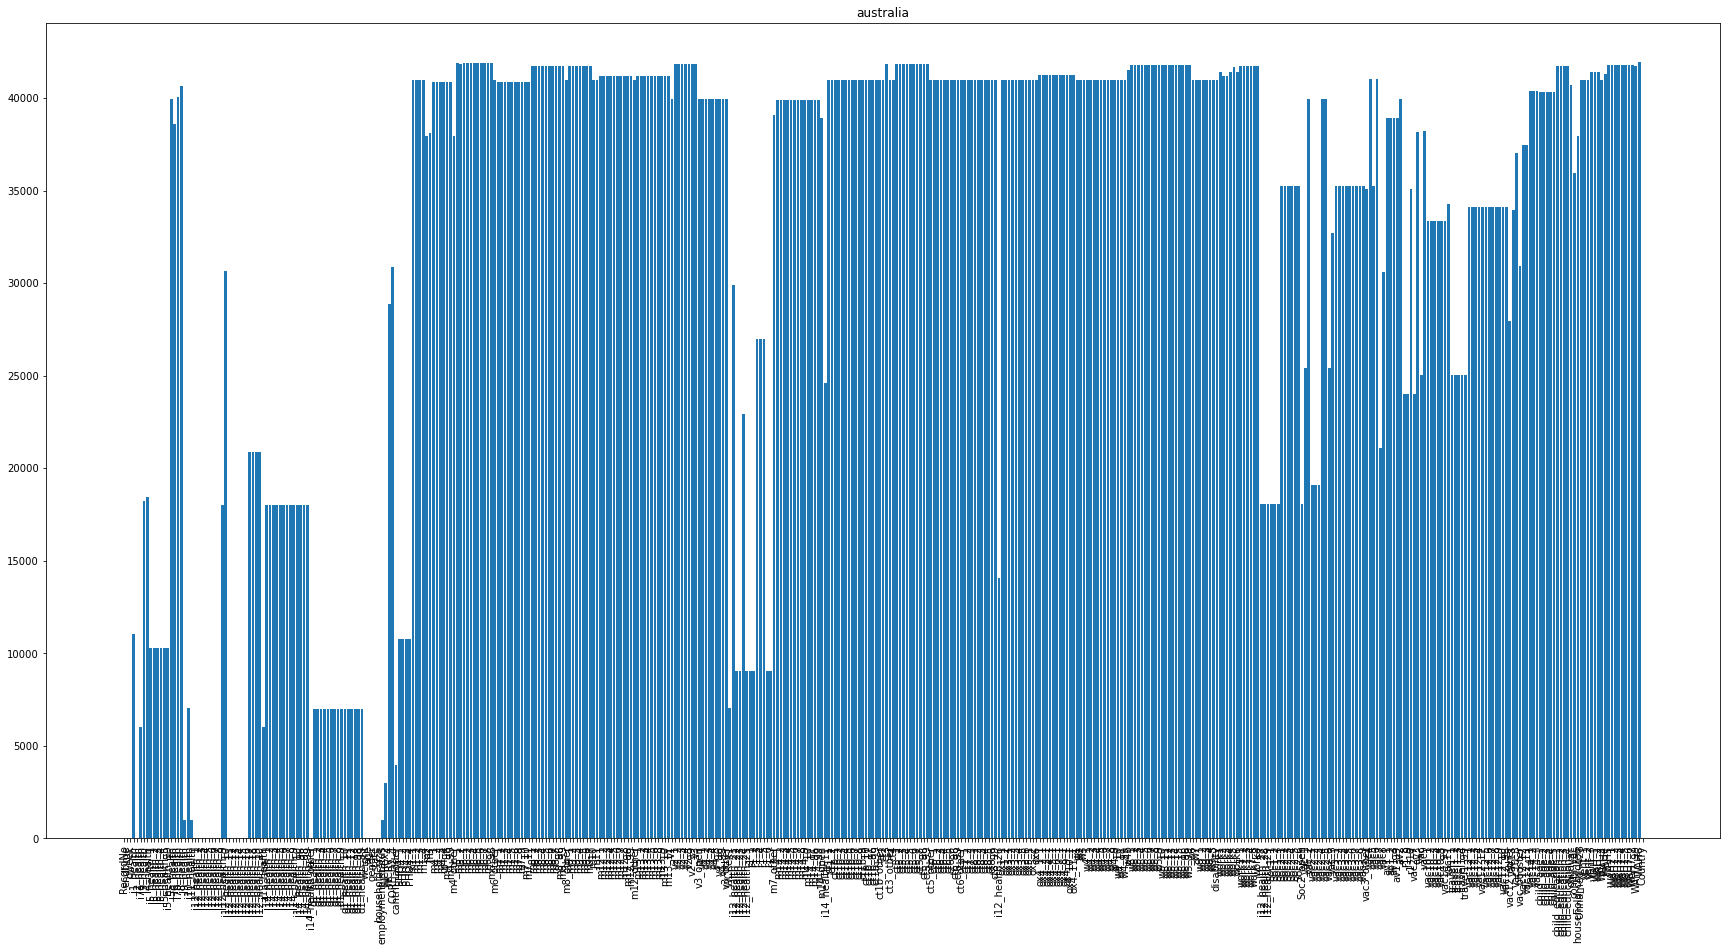

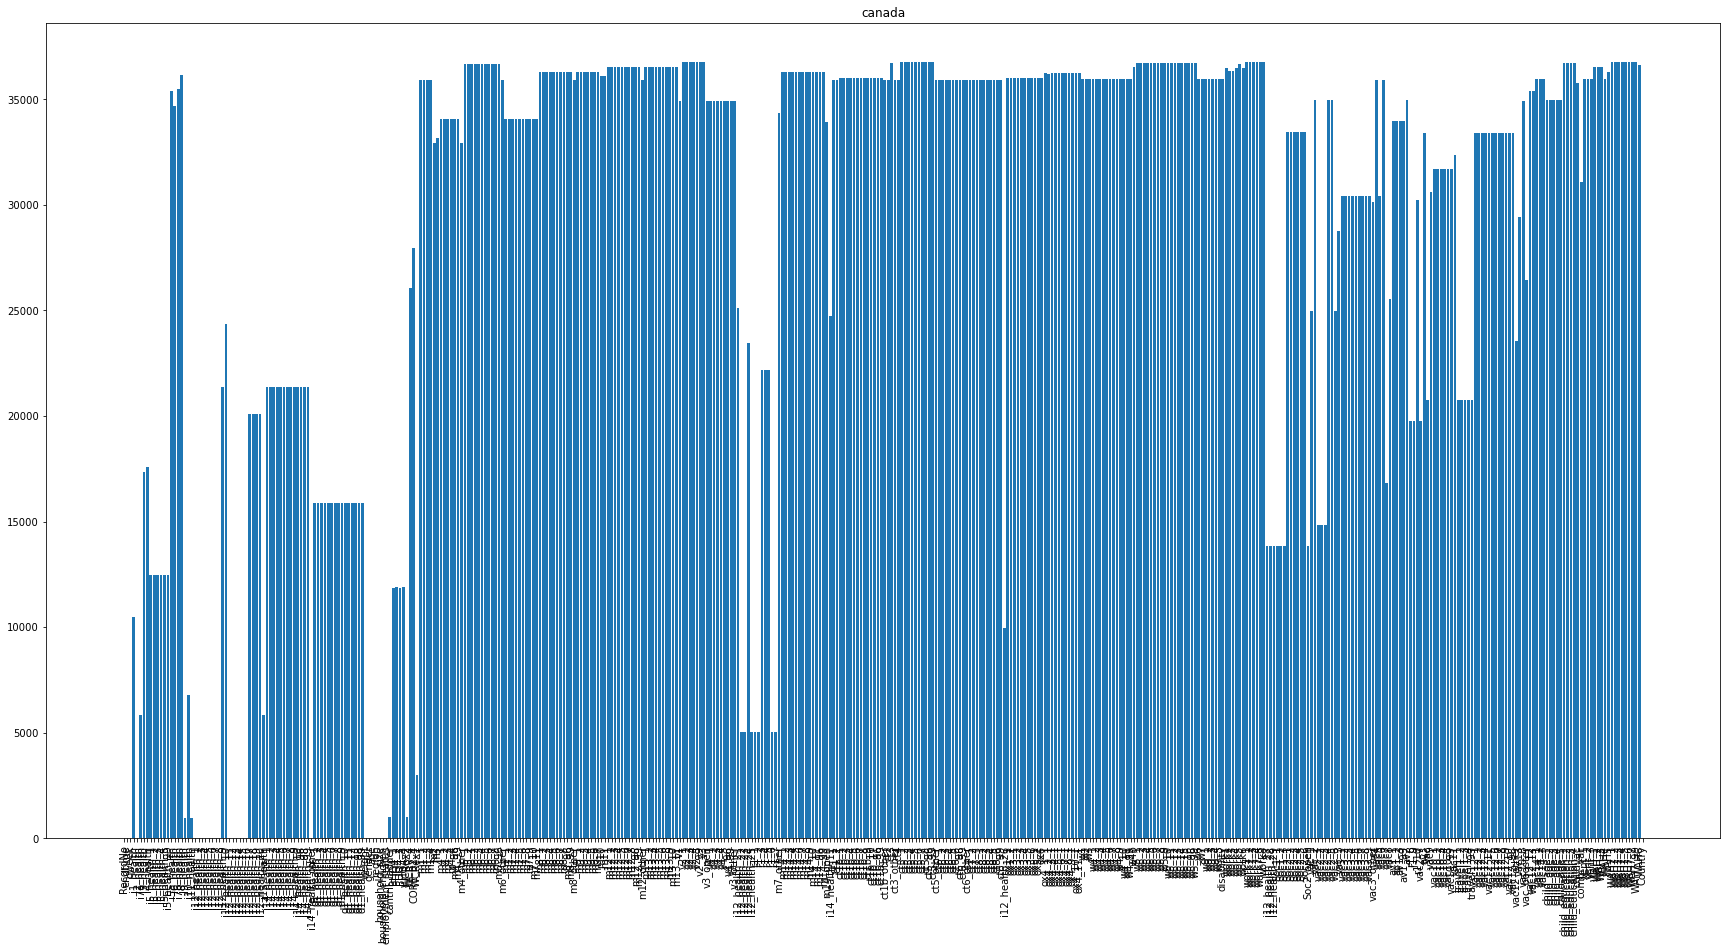

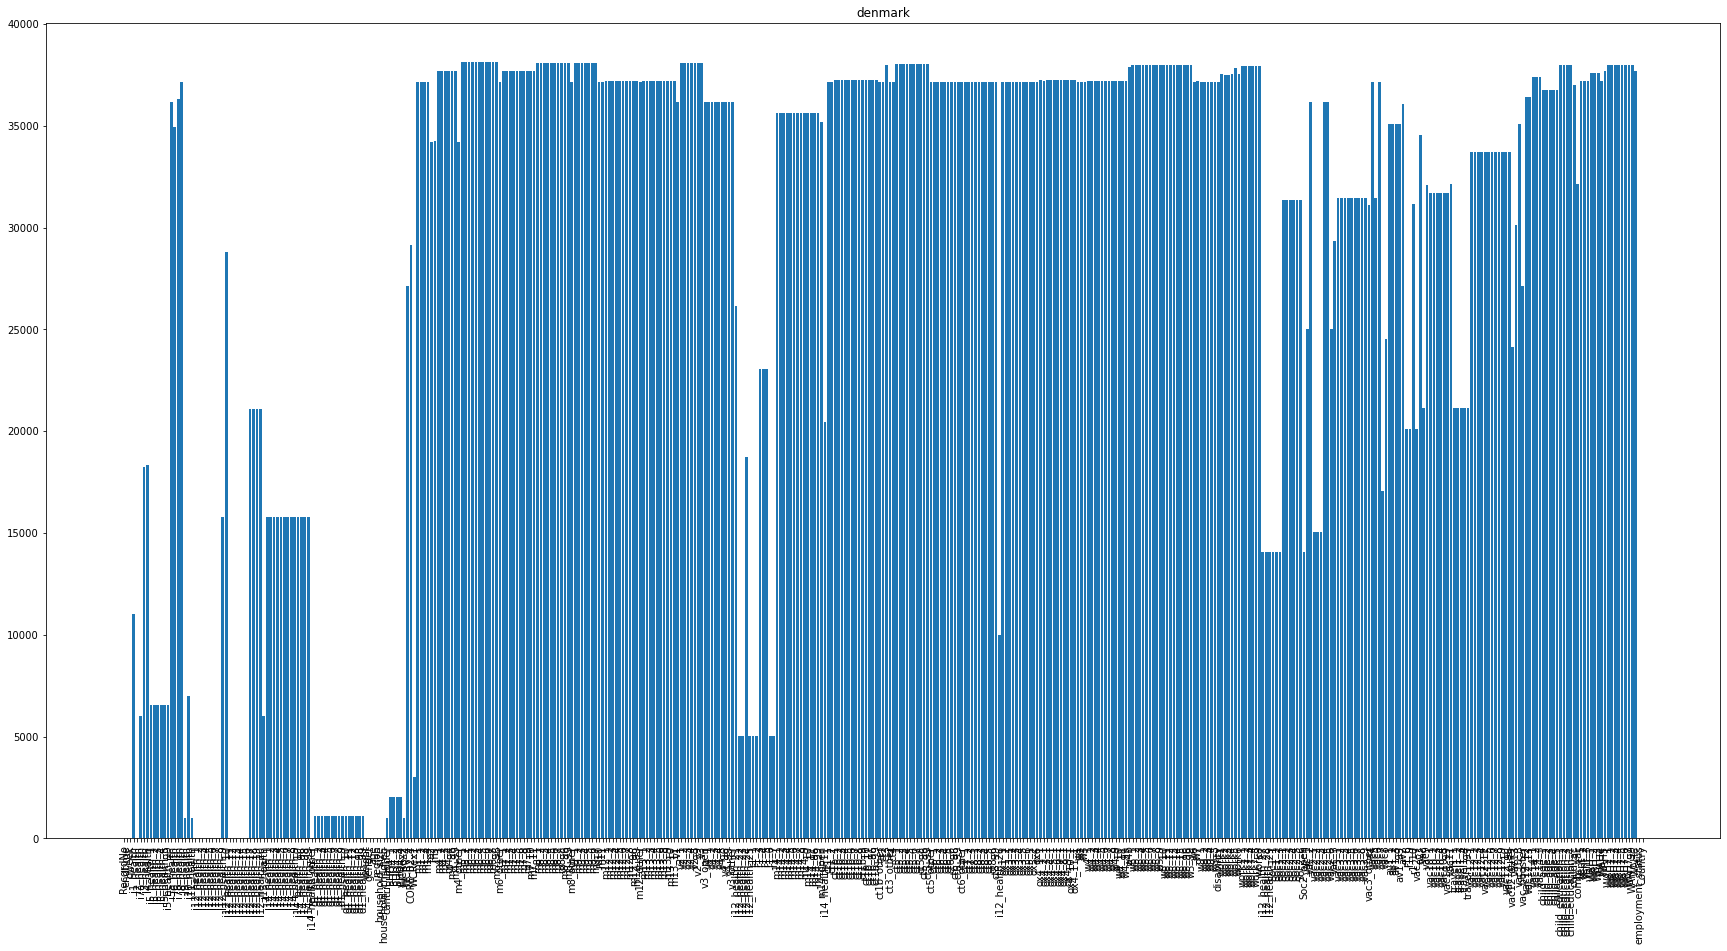

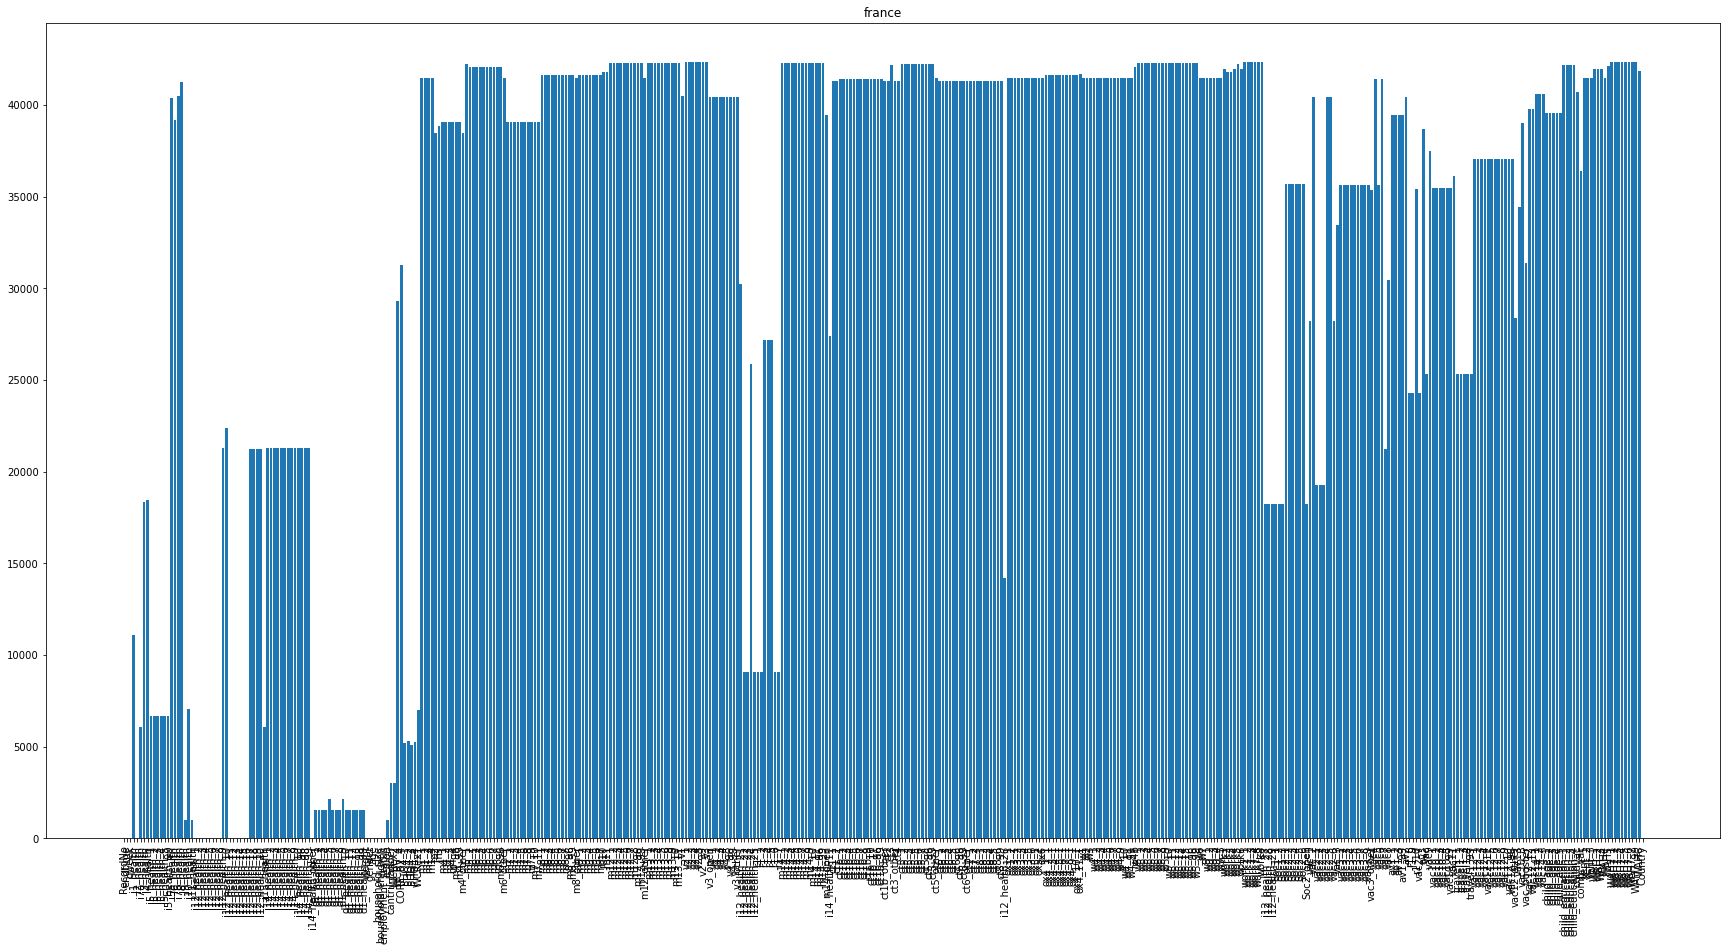

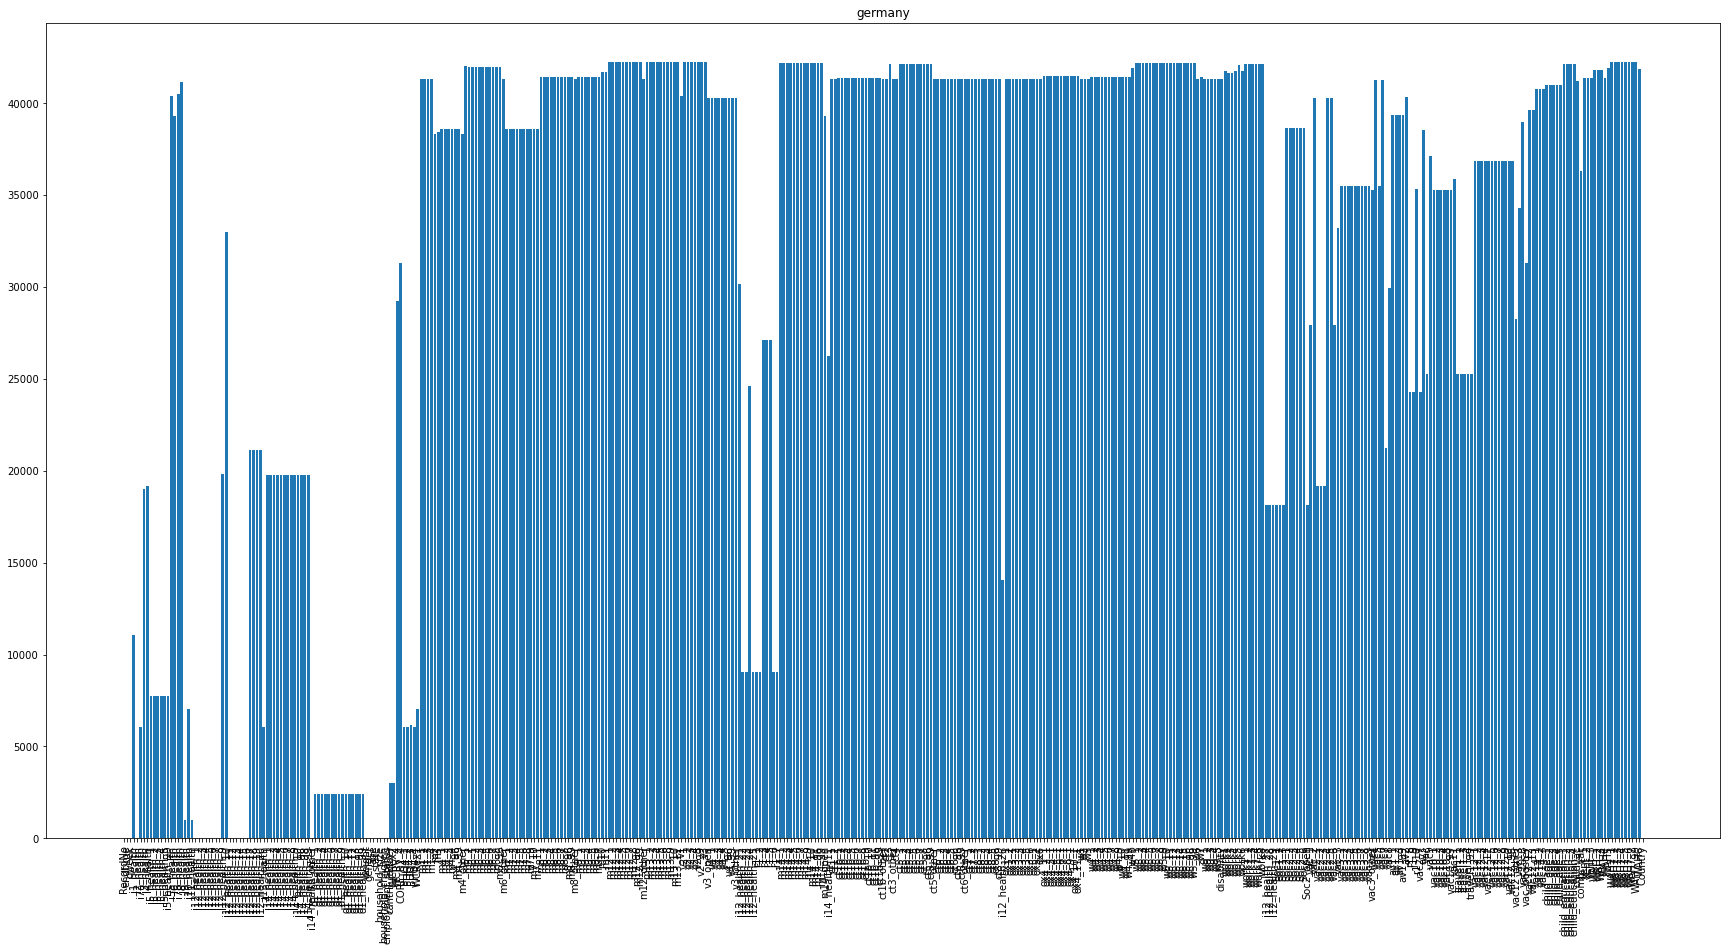

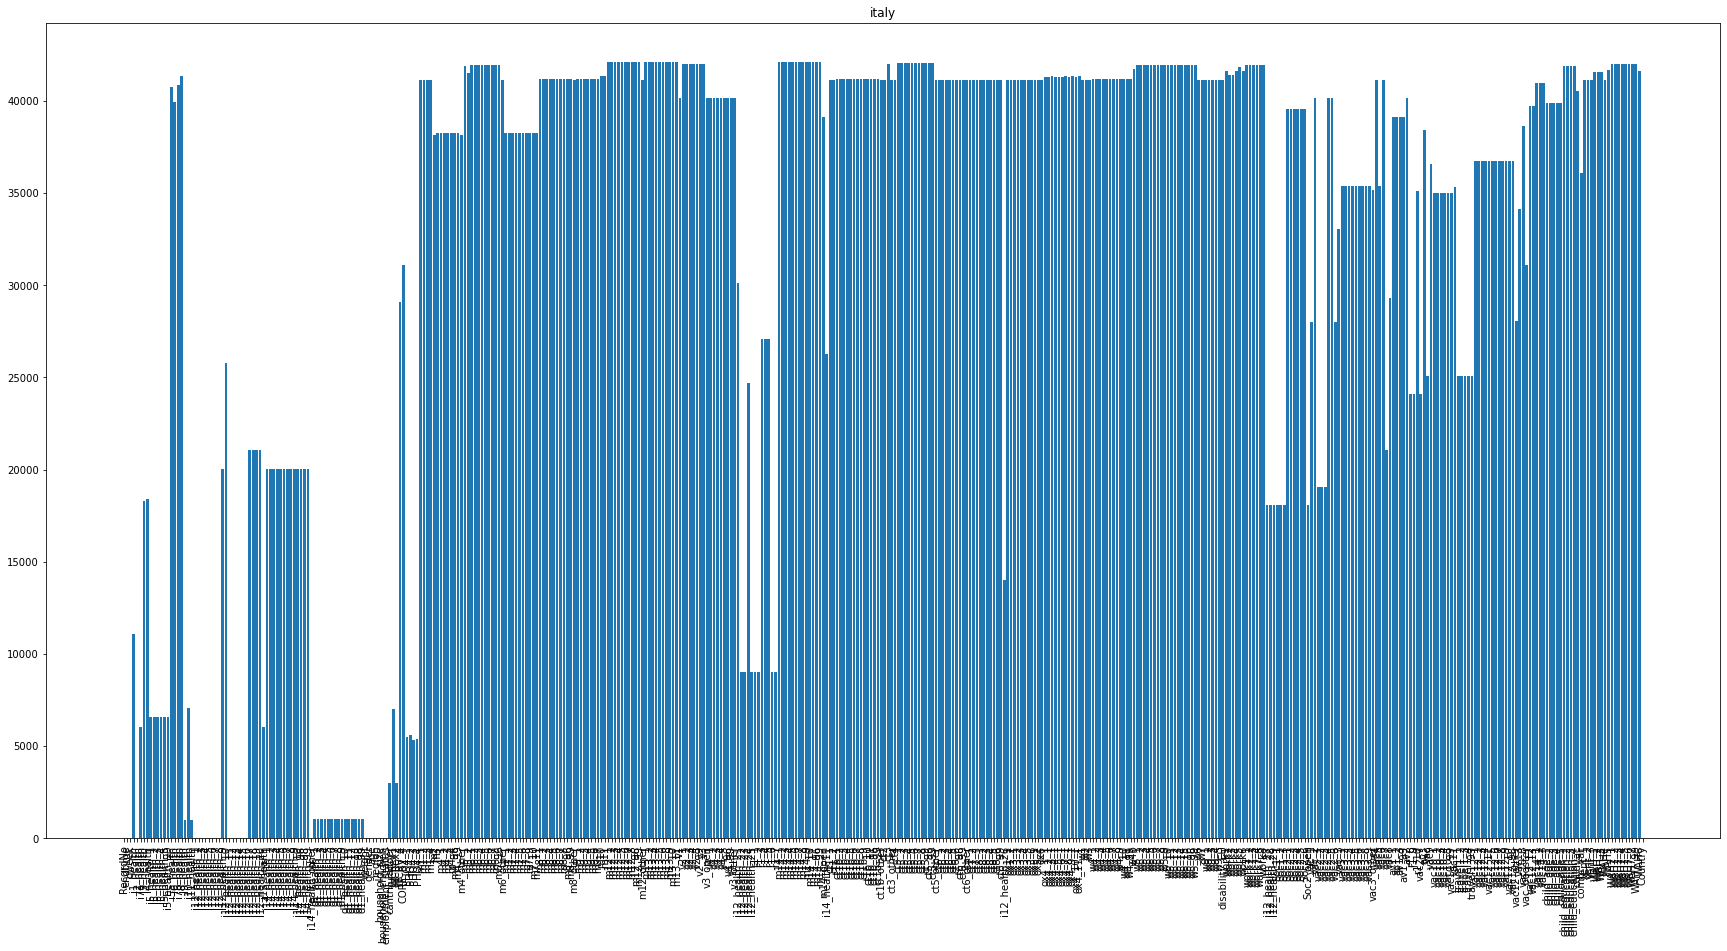

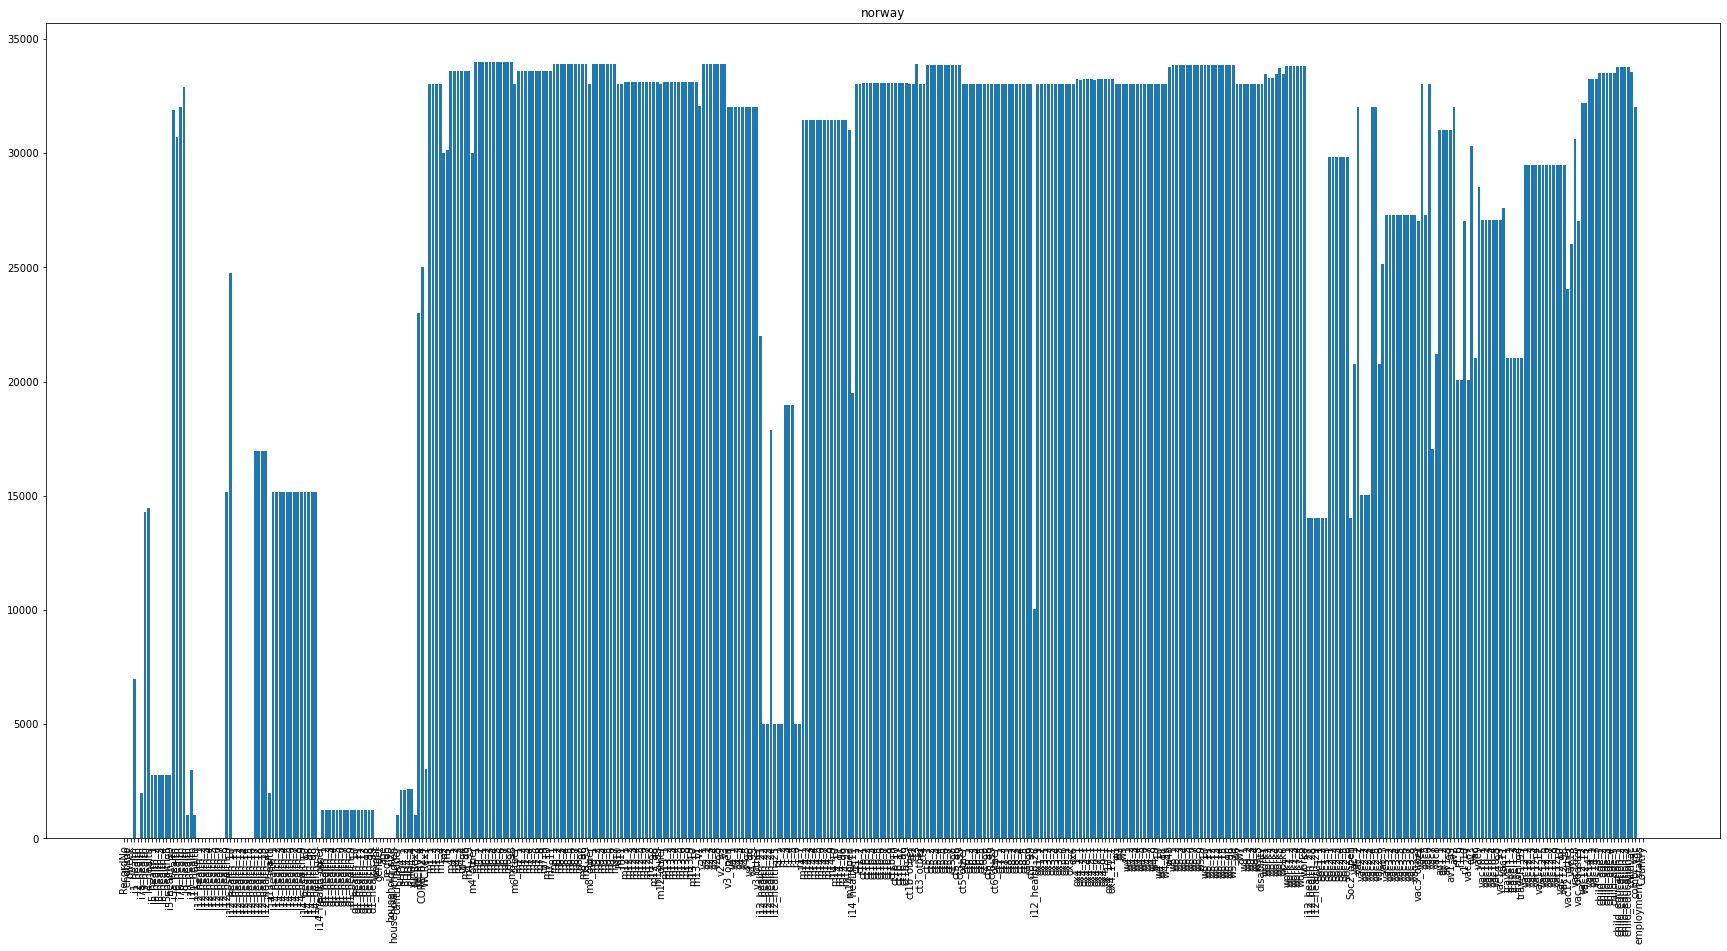

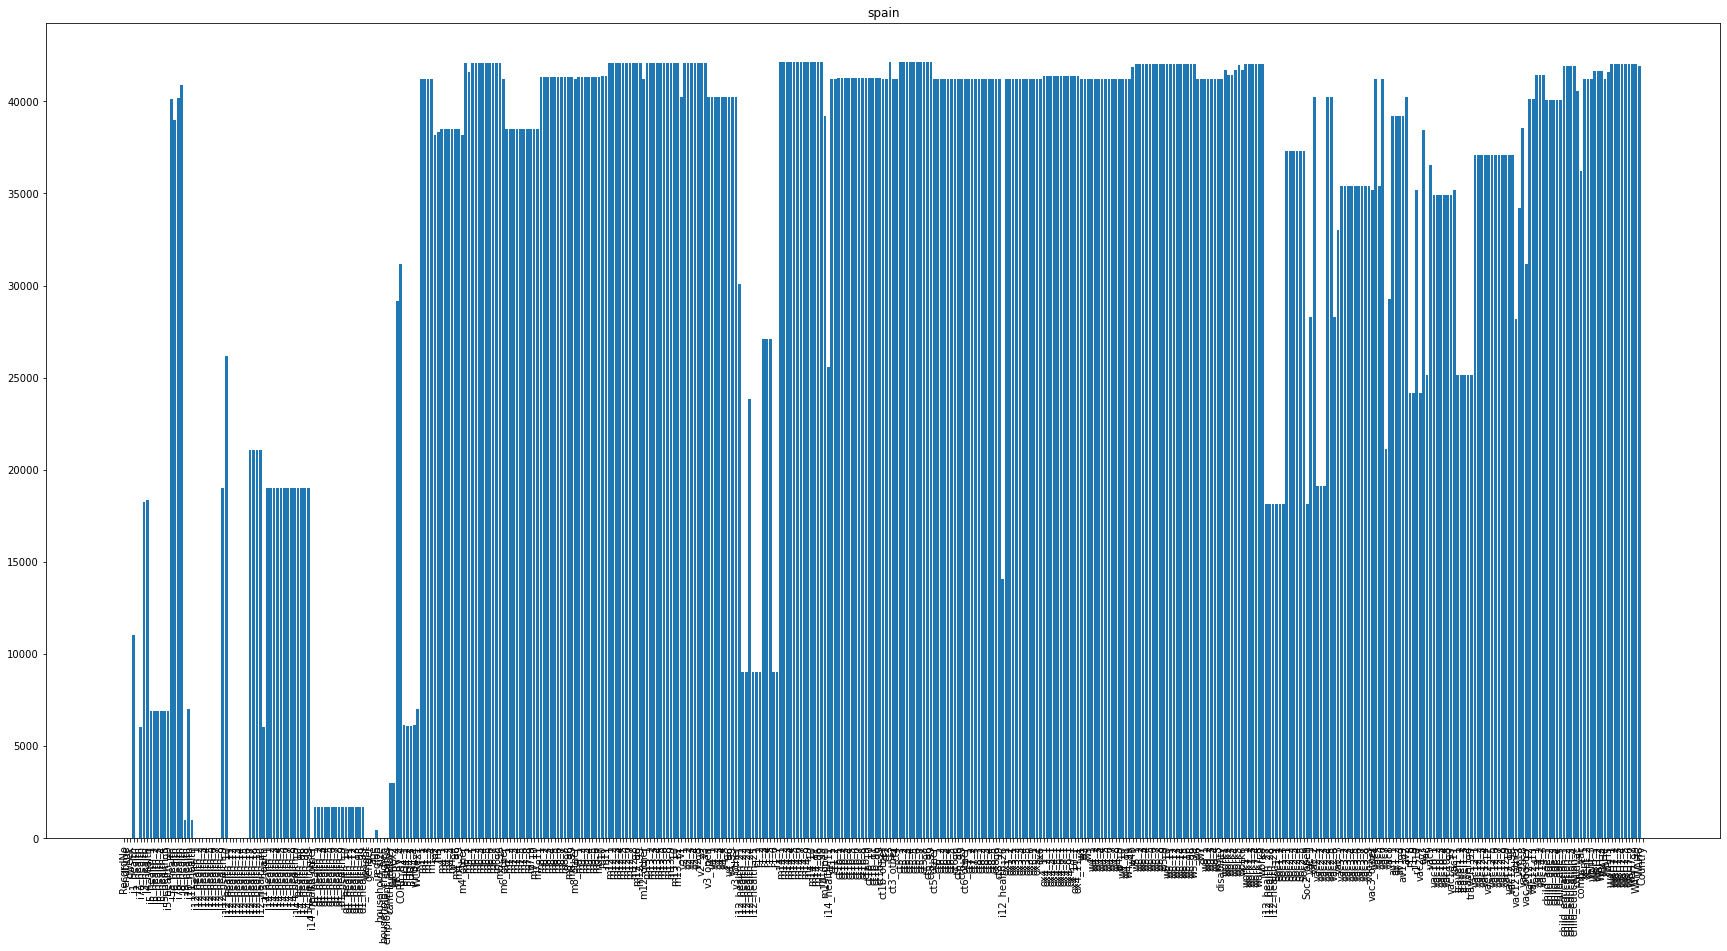

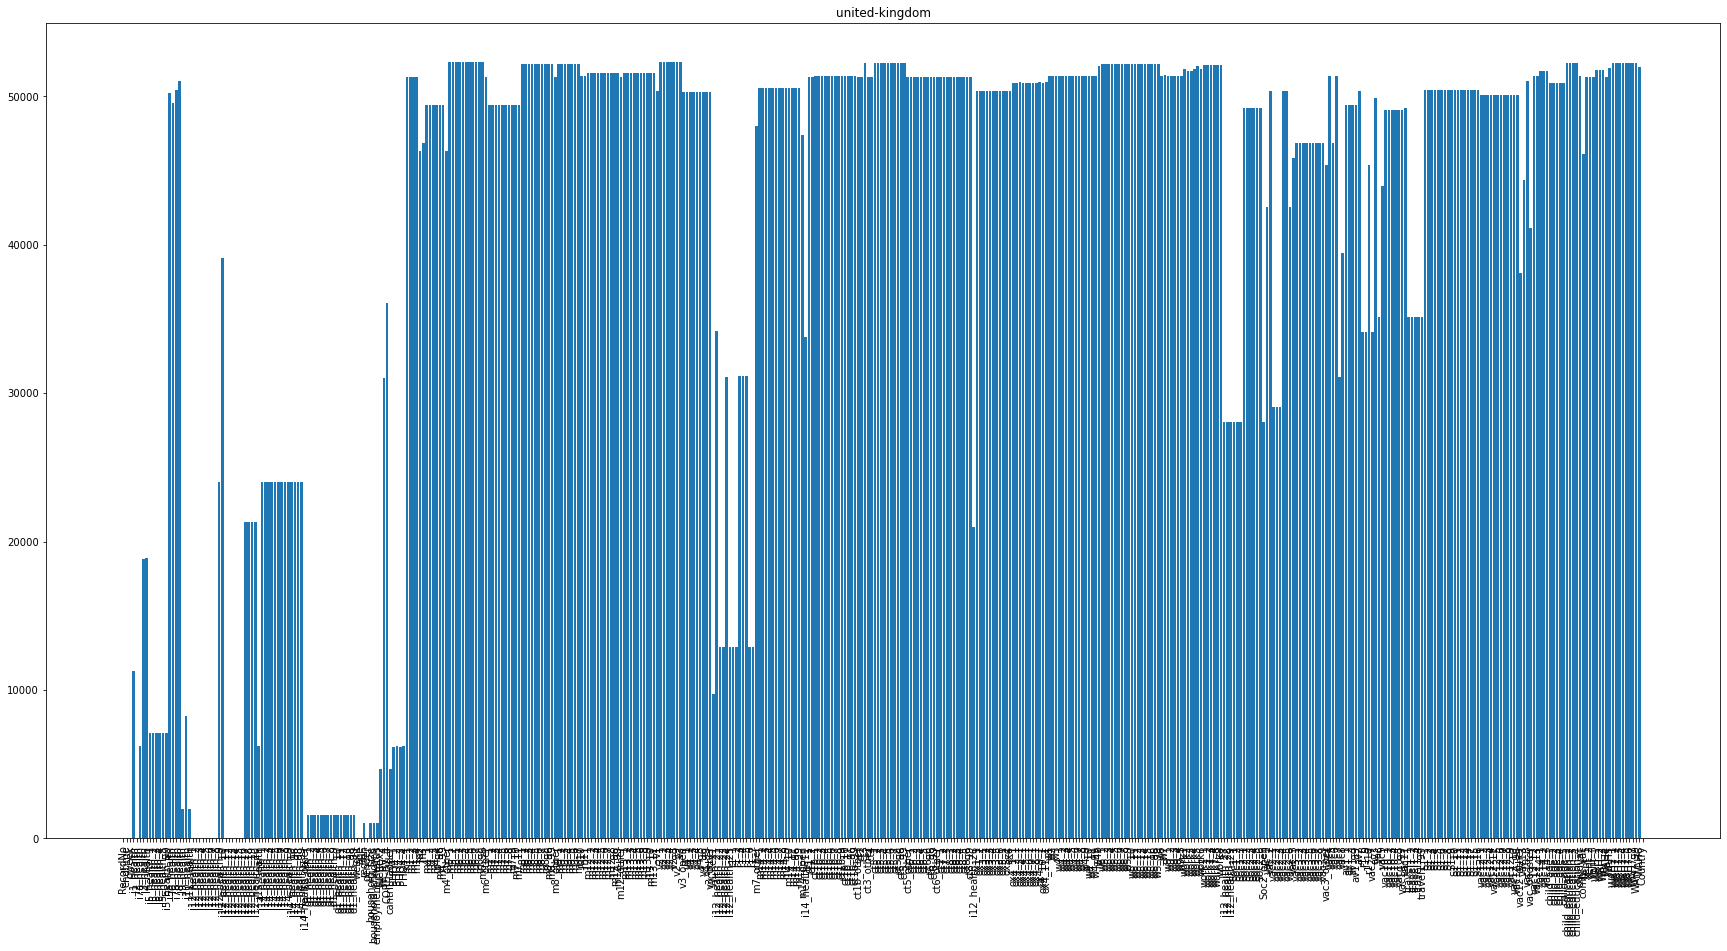

In [97]:
for kk in nulls_dic:
    plt.figure(figsize=(30, 15))
    plt.bar(range(len(nulls_dic[kk])), list(nulls_dic[kk].values()), align='center')
    plt.xticks(range(len(nulls_dic[kk])), list(nulls_dic[kk].keys()), rotation=90)
    plt.title(kk)
    plt.show()

In [139]:
row_nan={}
for k in dataframe_country_dict:
    for index, row in dataframe_country_dict[k].iterrows():
        row_sum = row.isnull().sum()
        try:
            row_nan[row_sum] +=1
        except:
            row_nan[row_sum] =1
row_nan        

{34: 18,
 33: 65,
 18: 4773,
 19: 1821,
 35: 3,
 20: 351,
 17: 11481,
 32: 413,
 16: 10163,
 31: 468,
 11: 14171,
 12: 2555,
 26: 5679,
 13: 1238,
 27: 3661,
 15: 2500,
 30: 460,
 14: 2630,
 29: 3851,
 10: 38602,
 25: 3486,
 3: 57085,
 4: 22383,
 6: 26993,
 7: 45507,
 5: 6753,
 23: 1206,
 8: 20143,
 24: 1184,
 22: 2008,
 9: 32074,
 21: 1066,
 28: 3710,
 2: 44088,
 48: 1,
 43: 3,
 50: 2,
 36: 1,
 47: 1,
 44: 2,
 45: 1}

In [147]:
for k in dataframe_country_dict:
    dataframe_country_dict[k] = dataframe_country_dict[k].dropna(thresh=30)


In [144]:
over_20={}
for k in row_nan:
    if k>20:
        over_20[k]=row_nan[k]
c=0
for l in over_20:
    c+=over_20[l]
c

27289

# Denmark code

In [5]:
file_name=f'data/denmark.csv'
df_d = pd.read_csv(file_name, na_filter=False)
df_d["employment_status"] = ""
df_d = emp_helper(df_d)
df_d=df_d[codes]
df_d['Country'] = 'denmark'
#df_d.rename(columns = code_dict, inplace = True)
dataframe_country_dict['denmark'] = df_d

NameError: name 'emp_dict' is not defined

# Apply 

## qweek

In [235]:
dataframe_country_dict['denmark']['qweek'] = dataframe_country_dict['denmark']['qweek'].apply(lambda x: x[5:])

## households

In [236]:
households =['household_size', 'household_children']

In [237]:
for col in households:
    dataframe_country_dict['denmark'][col] = dataframe_country_dict['denmark'][col].apply(lambda x: x[:1]).astype(int)

## relative risk/social attitudes

In [ ]:
risk_list = ['ox1_1', 'ox1_2','ox3_1', 'ox3_2', 'ox3_4']
for r_col in risk_list:
    dataframe_country_dict['denmark'][r_col] = dataframe_country_dict['denmark'][r_col].apply(lambda x: x[:1])

# Map

In [307]:
def mapper(code, dic):
    dataframe_country_dict['denmark'][code] = dataframe_country_dict['denmark'][code].map(dic) 

In [232]:
always_never_dic = {'Always':0, 'Frequently':1, 'Sometimes': 2, 'Rarely': 3, 'Not at all': 4}
yes_no_dic =  {'No':0, 'Yes':1}
willing_dic = {'Very willing':0, 'Somewhat willing':1, 'Neither willing nor unwilling': 2, 'Somewhat unwilling': 3, 'Very unwilling': 4, 'Not sure': 5}
vmuch_not_dic = {'Very much': 0, 'Somewhat': 1, 'Not at all': 2, 'Not sure': 3}
yes_no_ns_dic =  {'No':0, 'Yes':1, 'Not Sure': 2}
yes_no_dk_dic =  {'No':0, 'Yes':1, "Don't know": 2}
dis_agree_dic = {'Disagree':0, 'Agree':1}
no_days_mental_dic ={'Not at all':0, 'Several days':1, 'More than half the days':2, 
                 'Nearly every day':3, 'Prefer not to say':4}
mood_dic = {'At no time':0, 'Some of the time':1, 'Less than half of the time':2, 
            'More than half of the time':3, 'Most of the time':4, 'All the time':5}

## gender

In [233]:
g_dic = {'Male':0, 'Female':1}
mapper('gender', g_dic)

## self-isolate1

In [308]:
si1_dic = {'Very easy':0, 'Somewhat easy':1, 'Neither easy nor difficult': 2, 'Somewhat difficult': 3, 'Very difficult': 4, 'Not sure': 5}
mapper('i10_health', si1_dic)


## self-isolate2

In [318]:
mapper('i11_health', willing_dic)

## precautions

In [85]:
precaution_list=['i12_health_1', 'i12_health_2', 'i12_health_6', 'i12_health_8', 'i12_health_9', 'i12_health_10',
 'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_17','i12_health_18', 'i12_health_21']

for p_code in precaution_list:
    mapper(p_code, always_never_dic)

## yes and no

In [87]:
other_illness_list = ['d1_health_1', 'd1_health_2', 'd1_health_3', 'd1_health_4', 'd1_health_5', 'd1_health_6', 'd1_health_7',
 'd1_health_8', 'd1_health_9', 'd1_health_10', 'd1_health_11', 'd1_health_12', 'd1_health_13'] 

for i_code in other_illness_list:
    mapper(i_code, yes_no_dic)

##  govt handling

In [88]:
gov_dic = {'Very well':0, 'Somewhat well':1, 'Somewhat badly':2, 'Very badly':3, "Don't know":4}

mapper('WCRex1', gov_dic)

## health service trust

In [89]:
health_service_dic = {'A lot of confidence': 0, 'A fair amount of confidence': 1, 'Not very much confidence': 2, 'No confidence at all': 3, "Don't know": 4}

mapper('WCRex2', health_service_dic)

## Worried about catching?

In [90]:
catch_concern_dic = {'I am very scared that I will contract the Coronavirus (COVID-19)': 0,
 'I am fairly scared that I will contract the Coronavirus (COVID-19)':1,
 'I am not very scared that I will contract the Coronavirus (COVID-19)': 2,
 'I am not at all scared that I will contract the Coronavirus (COVID-19)': 3,
 "Don't know": 4,
 'Not applicable -I have already contracted Coronavirus (COVID-19)': 4}

mapper('WCRV_4', catch_concern_dic)

## attitude towards various Covid issues

In [163]:
att_list = ['r1_1', 'r1_2', 'r1_3', 'r1_4', 'r1_5','r1_6', 'r1_7']
for at in att_list:
    mapper(at, dis_agree_dic)
    

## How willing would you be to wear mask if...

In [103]:
mask_w_list = ['m1_1', 'm1_2', 'm1_3']
for mw in mask_w_list:
    mapper(mw, willing_dic)

## How did you feel wearing mask?

In [113]:
mask_feel_list = ['m7_1','m7_2', 'm7_3', 'm7_4', 'm7_5', 'm7_6', 'm7_8', 'm7_9','m7_10', 'm7_11']
for mf in mask_feel_list:
    mapper(mf, vmuch_not_dic)

## Vax status

In [127]:
vax_stat_dic= {'No, neither':0, 'Yes, one dose':1, 'Yes, two doses':2}
mapper('vac', vax_stat_dic)

## Vax houeshold

In [124]:
mapper('v1', yes_no_ns_dic)

## Vax household2

In [126]:
vh_list = ['v2_1', 'v2_2', 'v2_3', 'v2_4', 'v2_5', 'v2_99']
for vh in vh_list:
    mapper(vh, yes_no_dic)

## Vax important?

In [130]:
vax_imp_dic = {'Not at all important':0, 'A little important':1, 'Moderately important':2, 'Very important':3}
mapper('vac4', vax_imp_dic)

## Vax family pressure?

In [132]:
mapper('vac6', yes_no_ns_dic)

KeyError: 'vac6'

## Vax reluctance

In [145]:
anti_vax_list = ['av1_1', 'av1_2', 'av1_3']
for av in anti_vax_list:
    mapper(av, yes_no_dic)

## Vax reluctance2

In [151]:
vr2_dic= {'Yes, I think more research needs to be done before I will consider receiving the vaccine':0,
          "No, I don't think more research needs to be done before I will consider receiving the vaccine":1,
          "Not sure":2}
mapper('av2', vr2_dic)

## Vax trust

In [136]:
vax_trust_dic = {'Not at all':0, 'A little':1, 'Moderately':2, 'Very much':3}
mapper('vac7', vax_trust_dic)

## Vax govt power

In [139]:
vax_power_list=['vac12_12', 'vac12_13']
for vp in vax_power_list:
    mapper(vp, yes_no_dic)

## Vax prevent catching

In [142]:
mapper('r1_8', dis_agree_dic)

## Data concerns

In [166]:
ct_list = ['ct2', 'ct4']
for ct in ct_list:
    mapper(ct, yes_no_dk_dic)

## united society?

In [179]:
soc_un_dic = {'More united':0, 'No change':1, 'More divided':2}
mapper('w1', soc_un_dic)

## part of community?

In [180]:
poc_dic = {'Very strong':0, 'Somewhat strong':1, 'Somewhat weak':2, 'Very weak':3}
mapper('w2', poc_dic)

## mental health1

In [189]:
mh_list = ['w4_1', 'w4_2', 'w4_3', 'w4_6', 'w4_7', 'w4_8']
for mh in mh_list:
    mapper(mh, yes_no_dic)

## mental health2

In [209]:
mh_list2 = ['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4']
for mh2 in mh_list2:
    mapper(mh2, no_days_mental_dic)

In [213]:
mh_list3=['w9_1', 'w9_2', 'w9_3', 'w9_4', 'w9_5']
for mh3 in mh_list3:
    mapper(mh3, mood_dic)

## WFH

In [197]:
wfh1_dic = {'Yes, fully':0, 'Yes, partly':1, 'No, not at all':2}
wfh2_dic = {'No':0, 'Yes, within past 2 weeks':1, 
            'Yes, between 2 weeks and 2 months ago':2,
            'Yes, more than two months ago but since 1st February 2020':3}
wfh3_dic = {'No':0, 'Yes, that started within past 2 weeks':1, 
            'Yes, between 2 weeks and 2 months ago':2, 
            'Yes, more than two months ago but since 1st February 2020':3}
wfh4_dic = {'Very likely':0, 'Quite likely':1, 'Neither likely nor unlikely':2,
            'Quite unlikely':3, 'Very unlikely':4, "Don't know":5}
wfh5_dic = {'Yes, fully':0, 'Yes, partly':1, 'No, not at all':2}

In [199]:
mapper('work1', wfh1_dic)
mapper('work2', wfh2_dic)
mapper('work3', wfh3_dic)
mapper('work4', wfh4_dic)
mapper('work5', wfh5_dic)

# Get_dummies

In [239]:
def OHE(code, pf):
    dataframe_country_dict['denmark'] = pd.concat([dataframe_country_dict['denmark'], pd.get_dummies(dataframe_country_dict['denmark'][code], drop_first=True, prefix=pf)], axis=1)
    dataframe_country_dict['denmark'].drop(code, axis=1, inplace=True) 

## emp_status

In [240]:
OHE('employment_status', 'emp')

## test

In [298]:
OHE('i3_health', 'test')

# Median nan filler

In [296]:
def median_nan(code):
    dataframe_country_dict['denmark'][code] = dataframe_country_dict['denmark'][code].replace(r'^\s*$', np.nan, regex=True).astype('int32')
    median_value=dataframe_country_dict['denmark'][code].median().astype('int32')
    dataframe_country_dict['denmark'][code].fillna(value=median_value, inplace=True)
    

In [294]:
median_nan('i1_health')

In [289]:
median_nan('i7a_health')

# Code calc

In [311]:
code_dict['i11_health']

'If you were advised to do so by a healthcare professional or public health authority to what extent are you willing or not to self-isolate for 7 days?'

In [317]:
dataframe_country_dict['denmark']['i11_health'].value_counts()

Very willing                     19289
Somewhat willing                 10595
Neither willing nor unwilling     4378
Somewhat unwilling                1240
                                  1004
Not sure                           989
Very unwilling                     657
Name: i11_health, dtype: int64

# col tester

In [319]:
dataframe_country_dict['denmark'].info(max_cols=170)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38152 entries, 0 to 38151
Data columns (total 122 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   qweek               38152 non-null  object 
 1   age                 38152 non-null  int64  
 2   weight              38152 non-null  float64
 3   gender              38152 non-null  object 
 4   household_size      38152 non-null  object 
 5   household_children  38152 non-null  object 
 6   employment_status   38152 non-null  object 
 7   i1_health           38152 non-null  object 
 8   i2_health           38152 non-null  int64  
 9   i7a_health          38152 non-null  object 
 10  i3_health           38152 non-null  object 
 11  i10_health          38152 non-null  object 
 12  i11_health          37148 non-null  float64
 13  i12_health_1        38152 non-null  object 
 14  i12_health_2        38152 non-null  object 
 15  i12_health_6        38152 non-null  object 
 16  i12

# To do list

## general and masks

In [ ]:
['i1_health',  
 'About how many people from your household have you come into physical contact with (within 2 meters / 6 feet)?',
 '- int - nans?',
 /
 
'i2_health',
 'Not including those people in your household, about how many people have you come into physical contact with (within 2 meters / 6 feet)?',
 'nans?',
/  
'i7a_health', 
 'How many times did you leave your home yesterday?  If you are not staying at home, how many times did you leave where you are staying yesterday?',
 '- int - nans, del>15',
/
'i3_health',
 'In the last 7 days, have you personally been tested for coronavirus (COVID-19?)',
 '- pd.get dummies - nans'

        """1- Yes, and I tested positive

        2- Yes, and I tested negative

        3- Yes, and I have not received my results from the test yet

        4- No, I have not""",
/

'i10_health', -- check for nans/dtype

/     

'i11_health' -- check for nans/dtype

/
 
'i12_health_1', 'i12_health_2', 'i12_health_6', 'i12_health_8', 'i12_health_9', 'i12_health_10',
 'i12_health_11', 'i12_health_12', 'i12_health_13', 'i12_health_17','i12_health_18', 'i12_health_21', -- can be int
/
 
ALL INT YES NO…

['d1_health_1', 'd1_health_2', 'd1_health_3', 'd1_health_4', 'd1_health_5', 'd1_health_6', 'd1_health_7',
 'd1_health_8', 'd1_health_9', 'd1_health_10', 'd1_health_11', 'd1_health_12', 'd1_health_13'] 
/
 
'WCRex1', 'WCRex2'
/

'WCRV_4',
/ 

['m1_1', 'm1_2', 'm1_3']
/

'm2'
 
/


['m7_1','m7_2', 'm7_3', 'm7_4', 'm7_5', 'm7_6', 'm7_8', 'm7_9','m7_10', 'm7_11']

/ 



## vax and work

In [212]:
['v2_1', 'v2_2', 'v2_3', 'v2_4', 'v2_5', 'v2_99']
/
'vac'
/
'vac4'
/
'vac6', -int TO DO TO DO 

        0- No

        1- Yes

        99- Not sure

/
'vac7'
/

'vac12_12', 'vac12_13',
/
'r1_8'

/


['av1_1', 'av1_2', 'av1_3']

/

'av2'
/

['r1_1', 'r1_2', 'r1_3', 'r1_4', 'r1_5','r1_6', 'r1_7']

/
['ct2', 'ct4']
 
/
['ox1_1', 'ox1_2']- low to high
 
['ox3_1', 'ox3_2', 'ox3_4'] agree to disagree
/
['w1', 'w2']
/
['w4_1', 'w4_2', 'w4_3', 'w4_6', 'w4_7', 'w4_8']
/ 

['work1', 'work2', 'work3', 'work4', 'work5']
 
/

'cantril_ladder'
/

['PHQ4_1', 'PHQ4_2', 'PHQ4_3', 'PHQ4_4']
/

['w9_1', 'w9_2', 'w9_3', 'w9_4', 'w9_5']
/

SyntaxError: invalid syntax (<ipython-input-212-73b465dfd83b>, line 7)